In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
from google.colab import drive
drive.mount('/content/drive')
file_path = "/content/drive/MyDrive/Raisin_Dataset.csv"
raisin = pd.read_csv(file_path, index_col = 0)

Mounted at /content/drive


In [6]:
raisin.head()

,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
Area,,,,,,,
87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


In [15]:
raisin.isna().sum()

MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Class              0
dtype: int64

In [10]:
raisin.columns

Index(['MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'ConvexArea',
       'Extent', 'Perimeter', 'Class'],
      dtype='object')

In [11]:
raisin_input  = raisin[["MajorAxisLength", "MinorAxisLength", "Eccentricity", "ConvexArea", "Extent", "Perimeter"]].to_numpy()
raisin_target = raisin["Class"].to_numpy()

In [13]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(raisin_input, raisin_target)

In [14]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled  = ss.transform(test_input)

In [16]:
#LR
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_scaled, train_target)

LogisticRegression()

In [19]:
print(lr.predict_proba(train_scaled[:5]))
print(lr.classes_)

[[0.87525355 0.12474645]
 [0.16306573 0.83693427]
 [0.16890184 0.83109816]
 [0.89014897 0.10985103]
 [0.10305693 0.89694307]]
['Besni' 'Kecimen']


In [20]:
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.8651851851851852
0.8711111111111111


In [21]:
train_input, test_input, train_target, test_target = train_test_split(raisin_input, raisin_target)
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled  = ss.transform(test_input)

In [23]:
#SVM
from sklearn.svm import SVC
svc = SVC()
svc.fit(train_scaled, train_target)
svc_prediction = svc.predict(test_scaled)


In [27]:
print(svc.score(train_scaled, train_target))
print(svc.score(test_scaled, test_target))

0.8844444444444445
0.8222222222222222


In [ ]:
train_input, test_input, train_target, test_target = train_test_split(raisin_input, raisin_target)
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled  = ss.transform(test_input)

In [28]:
#DT
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))
#과대적합 or 내가 뭘 잘못해서 1.0이 나온건지 확인...

1.0
0.7733333333333333


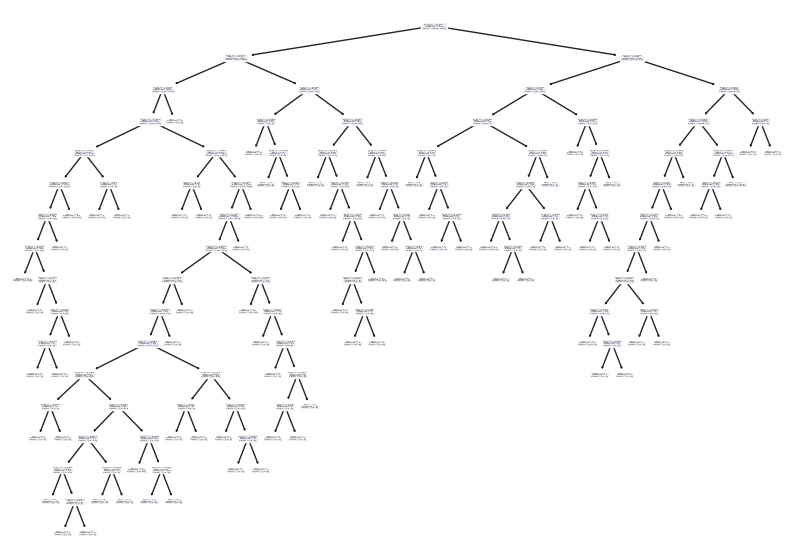

In [30]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()

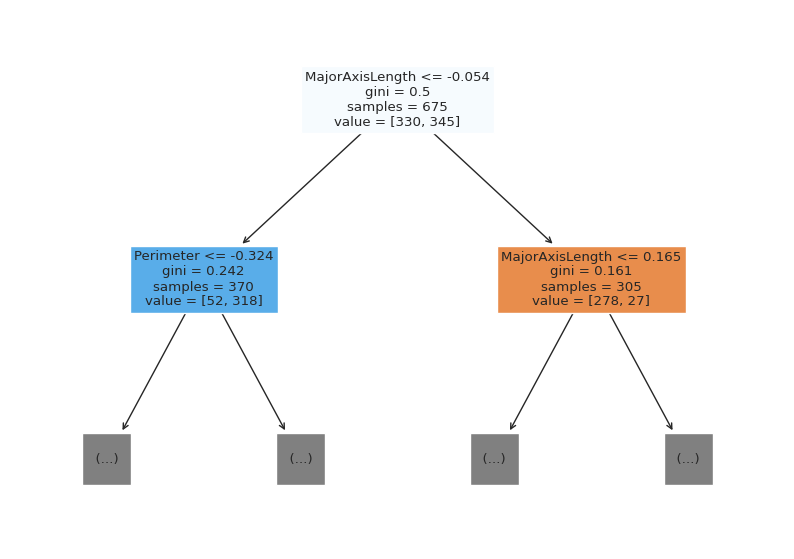

In [34]:
plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=1, filled=True, feature_names=['MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'ConvexArea', 'Extent', 'Perimeter'])
plt.show()

In [35]:
print(dt.feature_importances_)

[0.67756337 0.04095765 0.0433775  0.09361081 0.07215295 0.07233771]


In [36]:
train_input, test_input, train_target, test_target = train_test_split(raisin_input, raisin_target, test_size=0.2 )

In [37]:
#교차검증 시도
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_jobs=-1)

In [39]:
scores = cross_validate(rf, train_input, train_target, return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

1.0 0.8541666666666666


In [40]:
rf.fit(train_input, train_target)
print(rf.feature_importances_)
#['MajorAxisLength', 'Eccentricity', 'ConvexArea', 'Perimeter']

[0.29340742 0.09230289 0.11359124 0.16923955 0.07694195 0.25451696]


In [41]:
rf = RandomForestClassifier(oob_score=True,n_jobs=-1)
rf.fit(train_input, train_target)
print(rf.oob_score_)

0.8569444444444444
